In [20]:
%load_ext autoreload
%autoreload 2

import os
import oddsapi
import requests
import pandas as pd
import numpy as np
from common.utils.odds_utils import get_tournament_winner_odds, get_group_stage_odds
API_KEY = os.getenv("API_KEY")
from oddsapi import OddsApiClient
client = OddsApiClient(api_key=API_KEY)
from common.utils.simulation_utils import WorldCupTeam, WorldCupSim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
df_winner = get_tournament_winner_odds(API_KEY)
df_group_stage = get_group_stage_odds(API_KEY)
df_groups = pd.read_csv("common/ressources/df_groups.csv")[["Team","group"]]
df_group_stage = df_group_stage[['home_team','away_team','prob1','probx', 'prob2']].merge(df_groups.rename(columns =  {"Team":"home_team"}), on = "home_team")

In [22]:
import copy as copy
Nsims = 10000
sims = []
for _ in range(Nsims):
    # collect team data (needs to be redone in each loop of sim)
    group_names = list(df_groups["group"].unique())
    teams = [WorldCupTeam(row['group'], row['Team']) for ix, row in df_groups.iterrows()]
        # initialise simulation
    s = WorldCupSim(group_names, teams, df_group_stage, df_winner, verbose=False)
    
    # run simulated world cup
    s.runsim() 
    sims.append(copy.deepcopy(s))

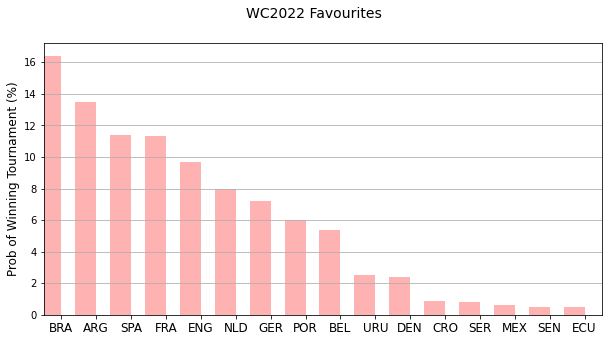

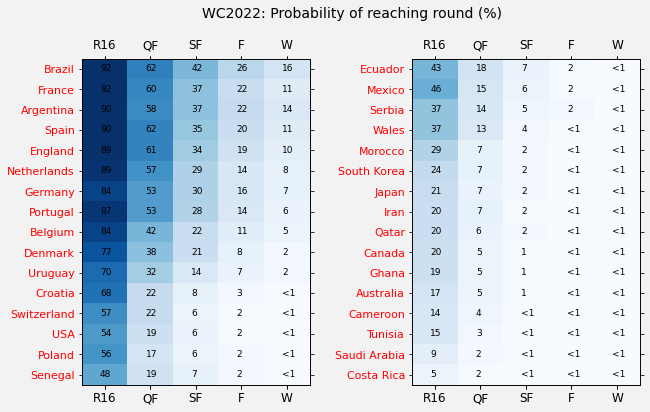

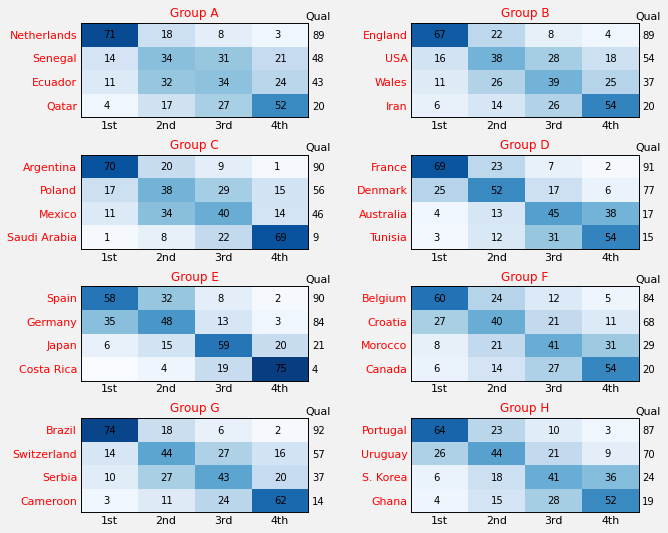

In [ ]:
from common.utils.WorldCupMetrics import SimWinners, makeProgressPlot, ExpectedGroupFinishesPlot, make_sankey
savePlots = True # plots saved in same directory
teamnames = list( df_groups["Team"].values )
SimWinners(sims,teamnames,includeOdds=False, save=savePlots)
makeProgressPlot( sims, teamnames, save=savePlots )
ExpectedGroupFinishesPlot(sims,group_names, save=savePlots)
make_sankey("Denmark", sims)

In [ ]:
import joblib
joblib.dump(sims, "sims")

['sims']